Analyzing data with PAAT
========

In [1]:
import warnings
warnings.filterwarnings('ignore')

import h5py
import paat
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 3]
plt.rcParams['font.size'] = '13'

2022-01-04 11:31:28.825331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-01-04 11:31:28.825354: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Load data from GT3X file
------------------------

To load data from a gt3x file, the :meth:`paat.io.read_gt3x` function is implemented in
the :mod:`paat.io` module.

In [2]:
time, acceleration, meta = paat.io.read_gt3x("data/nwt_recording.gt3x", rescale=True)

Save data in a Pandas DataFrame
-------------------------------

In [3]:
data = pd.DataFrame(acceleration, columns=['Y', 'X', 'Z'], index=time)

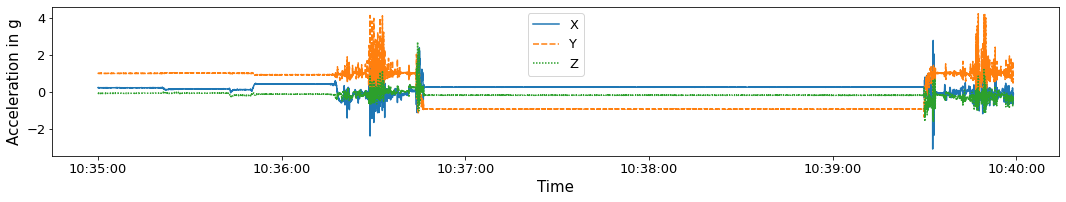

In [4]:
ax = sns.lineplot(data=data[['X', 'Y', 'Z']], legend=True)

labels = [(data.index[0] + pd.to_timedelta(minutes, unit='m')).strftime("%H:%M:%S") for minutes in range(len(ax.get_xticks()))]
ax.set_xticklabels(labels)   

# Set axes labels
ax.set_xlabel("Time", size=15)
ax.set_ylabel("Acceleration in g", size=15)

plt.tight_layout()
print('')

Detect non-wear periods
-----------------------

Different methods to infer non-wear time from the raw acceleration signal are
implemented in the `paat.wear_time` module. We suggest to use
`paat.wear_time.detect_non_wear_time_syed2021` published by [Syed et al. (2021)](https://doi.org/10.1038/s41598-021-87757-z) as this algorithm demonstrated the most accurate estimates for hip-worn ActiGraph acceleration.

In [5]:
data.loc[:, "Non Wear Time"] = paat.wear_time.detect_non_wear_time_syed2021(acceleration, 
                                                                            hz=meta['Sample_Rate'])

2022-01-04 11:31:34.555757: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-01-04 11:31:34.555795: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-01-04 11:31:34.555821: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (neptune): /proc/driver/nvidia/version does not exist
2022-01-04 11:31:34.556152: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


But there are also other non-wear time algorithm implemented in the `paat.wear_time`
module. For wrist-worn accelerometer data, the method developed by [Hees et al (2011)](https://doi.org/10.1371/journal.pone.0022922) might be more
appropriate and is implemented in `paat.wear_time.detect_non_wear_time_hees2011`:

In [6]:
data.loc[:, "Non Wear Time Hees"] = paat.wear_time.detect_non_wear_time_hees2011(acceleration, 
                                                                                 hz=meta['Sample_Rate'])